# Book Genre Classification

In [1]:
# computation, data manipulation and visualization
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Preprocessing 
import re 
import nltk
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 

# Machine Leearning Libriaries for model building
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.svm import SVC 
from sklearn import metrics 

In [2]:
# import data set
books = pd.read_csv("BooksDataSet.csv")
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [3]:
# drop the `Unnamed: 0` column
books = books.drop(columns=["Unnamed: 0"])
books.head(3)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...


## Exploratory Data Analysis

In [4]:
# Get more info about the data frame
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


There are no null values in our data set.

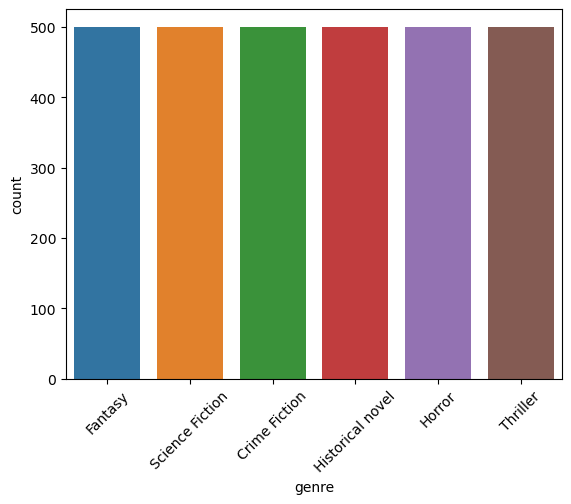

In [5]:
# lets ge a count plot of our target column
sns.countplot(data=books, x="genre")
plt.xticks(rotation = 45);

Our target column (multi-class classification) are equally distributed. We have a balanced class.

## Text Preprocessing

In [6]:
# View the summay of one book
# books["summary"].iloc[1]
books["summary"][1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

We can see that there are a lot of characters and punctuations in the summary. We will need to clean the text. Therefore, we will write a function to clean the text.

In [7]:
text = "eolus\'s castle, Jason, Leo and Piper become separated from Thalia, who promises to meet them at the Wolf House, the last place Thalia had seen Jason before this meeting. After being nearly apprehended by Aeolus, who is under Gaea\'s orders, the trio manage to escape thanks to Mellie, Aeolus`s former assi"
text

"eolus's castle, Jason, Leo and Piper become separated from Thalia, who promises to meet them at the Wolf House, the last place Thalia had seen Jason before this meeting. After being nearly apprehended by Aeolus, who is under Gaea's orders, the trio manage to escape thanks to Mellie, Aeolus`s former assi"

In [8]:
text = re.sub("[^a-zA-Z]", " ", text)
text

'eolus s castle  Jason  Leo and Piper become separated from Thalia  who promises to meet them at the Wolf House  the last place Thalia had seen Jason before this meeting  After being nearly apprehended by Aeolus  who is under Gaea s orders  the trio manage to escape thanks to Mellie  Aeolus s former assi'

In [9]:
text = " ".join(text.split())
text

'eolus s castle Jason Leo and Piper become separated from Thalia who promises to meet them at the Wolf House the last place Thalia had seen Jason before this meeting After being nearly apprehended by Aeolus who is under Gaea s orders the trio manage to escape thanks to Mellie Aeolus s former assi'

In [10]:
text = text.lower()
text

'eolus s castle jason leo and piper become separated from thalia who promises to meet them at the wolf house the last place thalia had seen jason before this meeting after being nearly apprehended by aeolus who is under gaea s orders the trio manage to escape thanks to mellie aeolus s former assi'

In [11]:
# Write a function to clean the text
def clean_text(text):
    
    # remove the "\" sign
    text = re.sub("'\''","",text)
    
    # remove special symbols
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Remove white spaces
    text = " ".join(text.split())
    
    # Conevrt text to lowercase
    text = text.lower()
    
    return text
    
# books["summary"] = books["summary"].apply(clean_text)

In [12]:
books['summary'].apply(clean_text)

0       drowned wednesday is the first trustee among t...
1       as the book opens jason awakens on a school bu...
2       cugel is easily persuaded by the merchant fian...
3       the book opens with herald mage vanyel returni...
4       taran and gurgi have returned to caer dallben ...
                              ...                        
2995    a novel from the numa files a kurt austin adve...
2996    gilbert kemp is dealer specializing in antique...
2997    how do you know when you re in too deep davey ...
2998    the story concerns the life of johnnie pascoe ...
2999    the first chief will henry lee the novel opens...
Name: summary, Length: 3000, dtype: object

In [13]:
books['summary'] = books['summary'].apply(lambda x:clean_text(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

### Plotting the most frequent words

In [14]:
text = "".join([char for char in text])
text

'eolus s castle jason leo and piper become separated from thalia who promises to meet them at the wolf house the last place thalia had seen jason before this meeting after being nearly apprehended by aeolus who is under gaea s orders the trio manage to escape thanks to mellie aeolus s former assi'

In [15]:
all_words = text.split()
all_words

['eolus',
 's',
 'castle',
 'jason',
 'leo',
 'and',
 'piper',
 'become',
 'separated',
 'from',
 'thalia',
 'who',
 'promises',
 'to',
 'meet',
 'them',
 'at',
 'the',
 'wolf',
 'house',
 'the',
 'last',
 'place',
 'thalia',
 'had',
 'seen',
 'jason',
 'before',
 'this',
 'meeting',
 'after',
 'being',
 'nearly',
 'apprehended',
 'by',
 'aeolus',
 'who',
 'is',
 'under',
 'gaea',
 's',
 'orders',
 'the',
 'trio',
 'manage',
 'to',
 'escape',
 'thanks',
 'to',
 'mellie',
 'aeolus',
 's',
 'former',
 'assi']

In [16]:
f_dist = nltk.FreqDist(all_words)
f_dist

FreqDist({'s': 3, 'to': 3, 'the': 3, 'jason': 2, 'thalia': 2, 'who': 2, 'aeolus': 2, 'eolus': 1, 'castle': 1, 'leo': 1, ...})

In [17]:
f_dist.values()

dict_values([1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
words_df = pd.DataFrame({'word':list(f_dist.keys()),'count':list(f_dist.values())})
words_df

,word,count
0,eolus,1
1,s,3
2,castle,1
3,jason,2
4,leo,1
5,and,1
6,piper,1
7,become,1
8,separated,1
9,from,1


In [19]:
words_df.nlargest(columns="count", n = 10)

,word,count
1,s,3
13,to,3
17,the,3
3,jason,2
10,thalia,2
11,who,2
32,aeolus,2
0,eolus,1
2,castle,1
4,leo,1


In [20]:
def most_frequent_words(text, no_of_words):
    
    # Get a single string of all the words
    all_words = " ".join([char for char in text])
    
    # Split the string of words into a list
    all_words = all_words.split()
    f_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(f_dist.keys()),'count':list(f_dist.values())})
    
    df = words_df.nlargest(columns="count", n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sns.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return words_df 

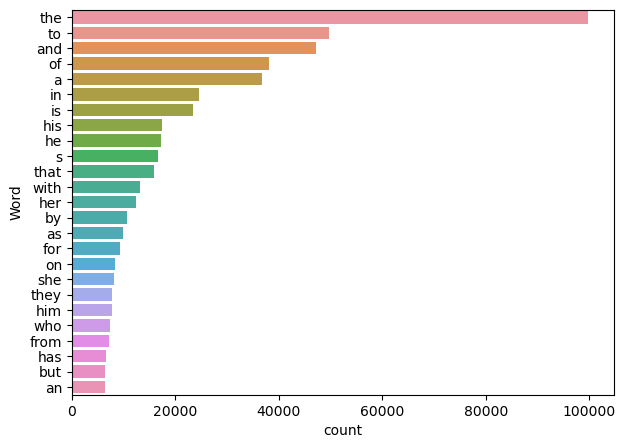

In [21]:
# Get the 25 most frequent words
words_df = most_frequent_words(books["summary"], 25)

In [22]:
words_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


The most common words are `the`, `to`, `and` etc. These are common everyday words (stopwords), but we will need words that has more meaning to the summary. We will have to remove these stop words.

### Removing Stopwords

In [23]:
# import stop words
from nltk.corpus import stopwords 
stop_words = set(stopwords.words("english"))

In [24]:
text

'eolus s castle jason leo and piper become separated from thalia who promises to meet them at the wolf house the last place thalia had seen jason before this meeting after being nearly apprehended by aeolus who is under gaea s orders the trio manage to escape thanks to mellie aeolus s former assi'

In [25]:
text = [word for word in text.split() if word not in stop_words]
text

['eolus',
 'castle',
 'jason',
 'leo',
 'piper',
 'become',
 'separated',
 'thalia',
 'promises',
 'meet',
 'wolf',
 'house',
 'last',
 'place',
 'thalia',
 'seen',
 'jason',
 'meeting',
 'nearly',
 'apprehended',
 'aeolus',
 'gaea',
 'orders',
 'trio',
 'manage',
 'escape',
 'thanks',
 'mellie',
 'aeolus',
 'former',
 'assi']

In [26]:
text = " ".join(text)
text

'eolus castle jason leo piper become separated thalia promises meet wolf house last place thalia seen jason meeting nearly apprehended aeolus gaea orders trio manage escape thanks mellie aeolus former assi'

In [27]:
books["summary"][1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

In [28]:
# write a function that removes the stopwords 
def remove_stop_words(text):
    
    removed_stop_word = [word for word in text.split() if word not in stop_words]
    
    return ' '.join(removed_stop_word)

books["summary"] = books["summary"].apply(remove_stop_words)
books['summary'].iloc[1]

'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piper leo told demigods taken back camp half blood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon dis

### Lemmatizing

In [29]:
# import lemmatizer
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

In [30]:
text = text.split()
text

['eolus',
 'castle',
 'jason',
 'leo',
 'piper',
 'become',
 'separated',
 'thalia',
 'promises',
 'meet',
 'wolf',
 'house',
 'last',
 'place',
 'thalia',
 'seen',
 'jason',
 'meeting',
 'nearly',
 'apprehended',
 'aeolus',
 'gaea',
 'orders',
 'trio',
 'manage',
 'escape',
 'thanks',
 'mellie',
 'aeolus',
 'former',
 'assi']

In [31]:
text = [lemma.lemmatize(word) for word in text]
text

['eolus',
 'castle',
 'jason',
 'leo',
 'piper',
 'become',
 'separated',
 'thalia',
 'promise',
 'meet',
 'wolf',
 'house',
 'last',
 'place',
 'thalia',
 'seen',
 'jason',
 'meeting',
 'nearly',
 'apprehended',
 'aeolus',
 'gaea',
 'order',
 'trio',
 'manage',
 'escape',
 'thanks',
 'mellie',
 'aeolus',
 'former',
 'assi']

In [32]:
text = " ".join(text)
text

'eolus castle jason leo piper become separated thalia promise meet wolf house last place thalia seen jason meeting nearly apprehended aeolus gaea order trio manage escape thanks mellie aeolus former assi'

In [33]:
# write a function that lemmatizes each word
def lemmatize(text):
    
    text = text.split()
    
    # lemmatize
    text = [lemma.lemmatize(word) for word in text]
    
    return " ".join(text)

# Apply lemmatization to the "summary" column
books["summary"] = books["summary"].apply(lemmatize)

In [34]:
books["summary"][1]

'book open jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turn venti storm spirit attack trio trip leader coach gleeson hedge ensuing fight jason surprise everyone including one coin turn sword us battle storm spirit coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turn jason shoe destroyed fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tell champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon discover enemy wor

### Stemming

In [35]:
# import stemmer
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

# write a function that stems
def stemming(text):
    text = text.split()
    
    # stem
    text = [stemmer.stem(word) for word in text]
    
    return " ".join(text)

books["summary"] = books["summary"].apply(stemming)
books["summary"][1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

We have removed stop words, lemmatized and stemmed the summary column. Now lets get a visual of the most frequent words.

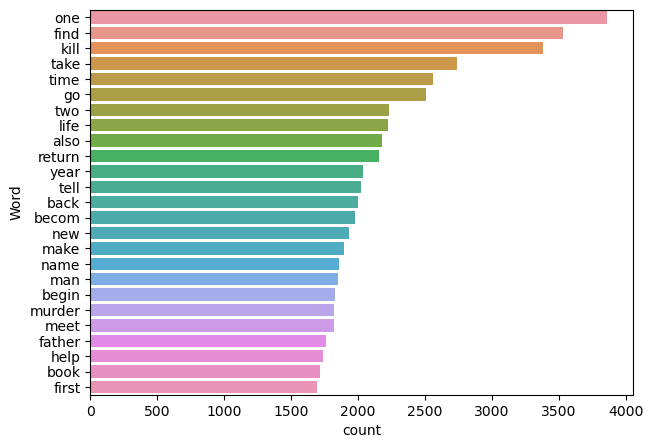

In [36]:
# Visualizing frequent words

freq_df = most_frequent_words(books["summary"], 25)

In [37]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1143,time,2563
88,go,2509
38,two,2235
418,life,2224
415,also,2179
407,return,2158


### Label Encoding

In [38]:
books_list = list(books["genre"].unique())
books_list

['Fantasy',
 'Science Fiction',
 'Crime Fiction',
 'Historical novel',
 'Horror',
 'Thriller']

In [39]:
encode = [i for i in range(len(books_list))]
encode

[0, 1, 2, 3, 4, 5]

In [40]:
mapper = dict(zip(books_list, encode))
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [41]:
books["genre"]

0        Fantasy
1        Fantasy
2        Fantasy
3        Fantasy
4        Fantasy
          ...   
2995    Thriller
2996    Thriller
2997    Thriller
2998    Thriller
2999    Thriller
Name: genre, Length: 3000, dtype: object

In [42]:
books["genre"] = books["genre"].map(mapper)
books["genre"]

0       0
1       0
2       0
3       0
4       0
       ..
2995    5
2996    5
2997    5
2998    5
2999    5
Name: genre, Length: 3000, dtype: int64

In [43]:
books["genre"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## Model Building

We will first need to convert the summary text into a count vectorizer (the numerical representation)

### Count Verctorizer

In [44]:
# Count vectorizer

count_vec = CountVectorizer(max_df=0.9, min_df=2, 
                           max_features=1000, stop_words="english")

bag_of_words_vec = count_vec.fit_transform(books["summary"])
bag_of_words_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 245387 stored elements in Compressed Sparse Row format>

In [45]:
# get train and test data
y = books["genre"]

X_train, X_test, y_train, y_test = train_test_split(bag_of_words_vec, 
                                                    y, 
                                                   test_size=0.2)

X_train.shape, X_test.shape

((2400, 1000), (600, 1000))

Let's start building, training and testing our models.

**SVC**

In [46]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
metrics.accuracy_score(y_test, svc_pred)

0.565

Our SVC model has an accuracy of 56%. Lets try another model

**Multinomial Naive Bayes**

In [47]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
metrics.accuracy_score(y_test, mnb_pred)

0.6783333333333333

Our MultinomialNB model performs better than the SVC model with a 66% accuracy.

**Random Forest**

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
metrics.accuracy_score(y_test, rf_pred)

0.6183333333333333

Our Random Forest model has an accuracy of 59%. 

We can see that our models are not performing well. Lets use a different text vectorizer. Previously we used CountVectortizer, now lets use TFDIF vectorizer

### TFDIF vectorizer

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(books["genre"])

X_train, X_test, y_train, y_test = train_test_split(books["summary"], 
                                                    y, 
                                                   test_size=0.2)

X_train.shape, X_test.shape

((2400,), (600,))

In [50]:
# perform tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
X_test_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

Now lets build the models again the the TFIDF vectorized data.

**SVC with TFIDF Vectorizer**

In [51]:
svc = SVC()
svc.fit(X_train_tfidf, y_train)
svc_pred = svc.predict(X_test_tfidf)
metrics.accuracy_score(y_test, svc_pred)

0.6983333333333334

Our SVC model trained on TFIDF Vectorizer performs better with an accuracy of 73%.

Lets try our MultinomialNB model

**MultinomialNB with TFIDF Vectorizer**

In [52]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
mnb_pred = mnb.predict(X_test_tfidf)
metrics.accuracy_score(y_test, mnb_pred)

0.725

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict(X_test_tfidf)
metrics.accuracy_score(y_test, rf_pred)

0.6216666666666667

### Testing the Model

In [54]:
# write a function that cleans a text and tests a model
def test(text, model):
    
    text = clean_text(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    
    return predicted

predicted_genre = books["summary"].apply(lambda text: test(text, svc)) 

predicted_genre

0       [0]
1       [0]
2       [0]
3       [0]
4       [0]
       ... 
2995    [5]
2996    [5]
2997    [5]
2998    [3]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [55]:
predicted_genre[0][0]

0

In [56]:
pred_genres = []
for i in range(len(predicted_genre)):
    
    index_val = predicted_genre[i][0]
    pred_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])

In [57]:
pred_genres

['Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Historical novel',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'F

In [58]:
predicted_genre

0       [0]
1       [0]
2       [0]
3       [0]
4       [0]
       ... 
2995    [5]
2996    [5]
2997    [5]
2998    [3]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [59]:
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [60]:
new_mapper = {value:key for key, value in mapper.items()}
new_mapper

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [61]:
genres = []

for i in range(len(predicted_genre)):
    pred_key = predicted_genre[i][0]
    genres.append(new_mapper[pred_key])

In [62]:
genres

['Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Historical novel',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'F

In [63]:
books["Actual Genre"] = books["genre"].map(new_mapper)
books["Predicted_genre"] = np.array(pred_genres)
books.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted_genre
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,5969644,Magic's Promise,0,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy


In [64]:
books = books[['book_name','summary','Actual Genre','Predicted_genre']]
books 

,book_name,summary,Actual Genre,Predicted_genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,Magic's Promise,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,Thriller,Thriller
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,know deep davey alway live shadow older brothe...,Thriller,Thriller
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,Thriller,Historical novel


In [65]:
dict(Counter(books['Actual Genre'].values))

{'Fantasy': 500,
 'Science Fiction': 500,
 'Crime Fiction': 500,
 'Historical novel': 500,
 'Horror': 500,
 'Thriller': 500}

In [66]:
dict(Counter(books['Predicted_genre'].values))

{'Fantasy': 498,
 'Science Fiction': 514,
 'Historical novel': 503,
 'Horror': 484,
 'Thriller': 486,
 'Crime Fiction': 515}

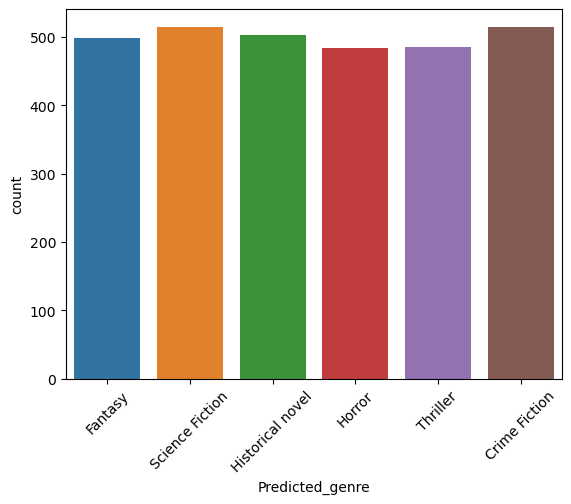

In [67]:
sns.countplot(x = books['Predicted_genre'])
plt.xticks(rotation = 45);

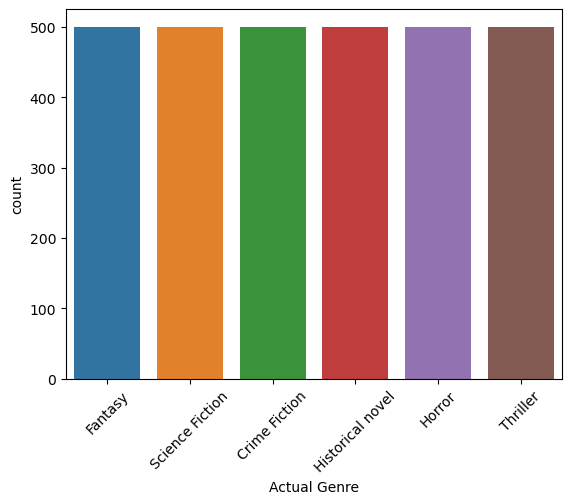

In [68]:
sns.countplot(x = books['Actual Genre'])
plt.xticks(rotation = 45);

In [69]:
# saving the model

import pickle
file = open('book_genre_model.pkl','wb')
pickle.dump(svc,file)
file.close()

In [70]:
file = open('tfdif_vector.pkl','wb')
pickle.dump(tfidf_vectorizer,file)
file.close()